In [49]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# Load the dataset
df = pd.read_csv('50_Startups.csv')

In [51]:
df.head()

,RnD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RnD             50 non-null     float64
 1   Administration  50 non-null     float64
 2   Marketing       50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [53]:
# Data Cleaning
# converting Categorical data to numeric data

#step1 : find the unique values
unique_states = df['State'].unique()

# step2 : replace unique_states with unique numeric values
state_numbers =[1,2,3]
df.replace(unique_states,state_numbers,inplace=True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RnD             50 non-null     float64
 1   Administration  50 non-null     float64
 2   Marketing       50 non-null     float64
 3   State           50 non-null     int64  
 4   Profit          50 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.1 KB


In [55]:
# Correlation
for column in df.columns:
    corr = np.corrcoef(df['Profit'],df[column])
    print(f"Correlation between Profit and {column} = {corr[0,1]}")

Correlation between Profit and RnD = 0.9729004656594832
Correlation between Profit and Administration = 0.20071656826872125
Correlation between Profit and Marketing = 0.7477657217414766
Correlation between Profit and State = 0.04847097181537067
Correlation between Profit and Profit = 1.0


In [56]:

#input variable
x = df.drop(['Profit','State'],axis=1)
#Output Variable
y = df['Profit']

In [57]:
#len(x)
#len(y)

In [58]:
#Split the dataset into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8)

In [59]:
#len(x_train)
#len(y_train)
#len(x_test)
len(y_test)

10

In [60]:
# Train the model
from sklearn.linear_model import LinearRegression

# create a model
model = LinearRegression()

# fit the model (train the model)
model.fit(x_train,y_train)

LinearRegression()

In [61]:
# Predictions

In [62]:
y_prediction = model.predict(x_test)

In [63]:
print(y_prediction)

[ 72077.68312966 127149.82720107 116536.04371804  98644.3179752
  98380.4172223   91058.2038972  134509.93237967 128628.72941206
 114797.11271872  50761.59601099]


In [64]:
print(x_test)

          RnD  Administration  Marketing
42   23640.93        96189.63  148001.11
13   91992.39       135495.07  252664.93
20   76253.86       113867.30  298664.47
31   61136.38       152701.92   88218.23
33   55493.95       103057.49  214634.81
35   46014.02        85047.44  205517.64
10  101913.08       110594.11  229160.95
12   93863.75       127320.38  249839.44
22   73994.56       122782.75  303319.26
49       0.00       116983.80   45173.06


In [65]:
print(y_test)

42     71498.49
13    134307.35
20    118474.03
31     97483.56
33     96778.92
35     96479.51
10    146121.95
12    141585.52
22    110352.25
49     14681.40
Name: Profit, dtype: float64


Text(0.5, 1.0, 'RnD VS Profit')

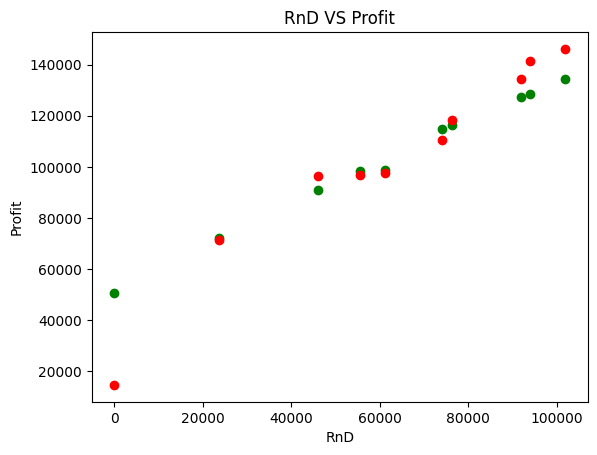

In [66]:
plt.scatter(x_test['RnD'],y_prediction,color='Green')
plt.scatter(x_test['RnD'],y_test,color='Red')
plt.xlabel('RnD')
plt.ylabel('Profit')
plt.title("RnD VS Profit")

Text(0.5, 1.0, 'RnD VS Profit')

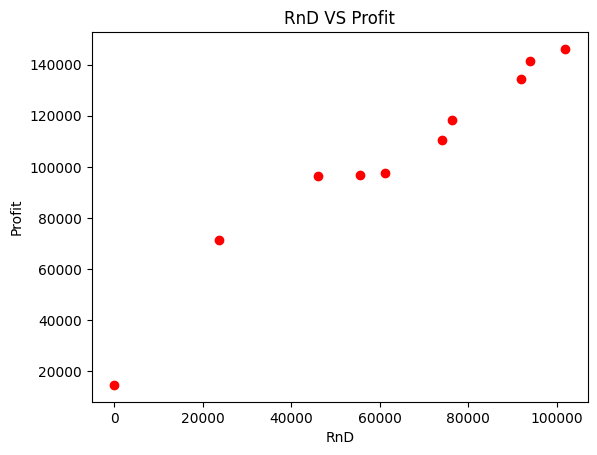

In [67]:
plt.scatter(x_test['RnD'],y_test,color='Red')
plt.xlabel('RnD')
plt.ylabel('Profit')
plt.title("RnD VS Profit")

In [68]:
# Get the errors
# Evaluating the algo


In [69]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [70]:
MAE = mean_absolute_error(y_test,y_prediction)
print(f"Mean Absolute Error Value = {MAE}")

Mean Absolute Error Value = 8295.213044883674


In [71]:
MSE = mean_squared_error(y_test,y_prediction)
print(f"Mean Sqaured Error Value = {MSE}")

Mean Sqaured Error Value = 171287882.47523662


In [72]:
rmse = np.sqrt(MSE)
print(f"Root Mean Sqaured Error Value = {rmse}")

Root Mean Sqaured Error Value = 13087.699663242453
